In [4]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [5]:
key = "1sKG6aj6JUQi8D22lH"  #my key for API access
material = "mp-570213"   #ID of my material
m = MPRester(key)
struct = m.get_structure_by_material_id(material,conventional_unit_cell=True) #Getting structure object
w = CifWriter(struct)    #Write to CIF
w.write_file(material+".cif") 
print("Click on the link to download my CIF file")
display(FileLink(material+".cif"))

Click on the link to download my CIF file


/home/users/g/m/gmevisse/mp-570213.cif

On nous demande ici de déterminer les 3 premiers pics du diffractogramme du matériau pour un rayonnement X incident Cu K$\alpha$ de longueur d'onde $\lambda = 1.54060 Å$. Ce rayonnement va créer des phénomènes d'interférences (destructives ou constructives) et donc de diffraction par la structure du cristal, que l'on peut analyser. Ici, on considère $2\theta$ comme étant l'angle entre la direction d'incidence et celle d'observation.

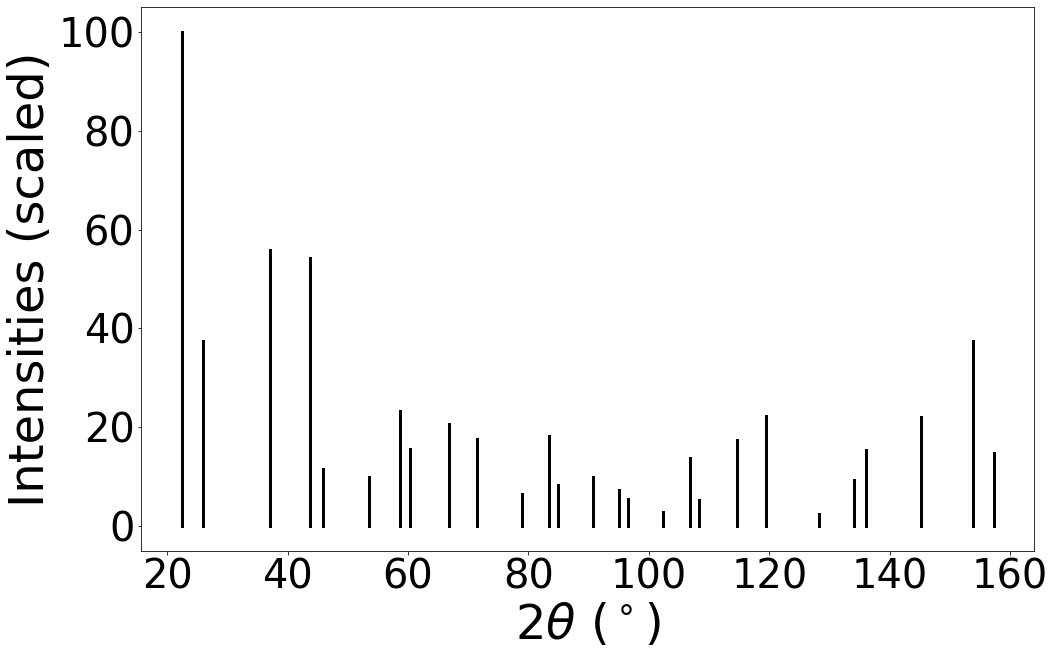

Pic numéro 1
Angle du pic : 22.464902864441168
Intensité du pic : 100.0
Indices hkl du pic : (1, 1, 1)
Multiplicité du pic : 8
 
Pic numéro 2
Angle du pic : 25.996820945151004
Intensité du pic : 37.461274740803404
Indices hkl du pic : (2, 0, 0)
Multiplicité du pic : 6
 
Pic numéro 3
Angle du pic : 37.094983827925695
Intensité du pic : 55.928851193309214
Indices hkl du pic : (2, 2, 0)
Multiplicité du pic : 12
 


In [30]:
#Création d'un objet XRDCalculator
xrd = XRDCalculator(1.54060)
#Calcul de la diffraction
dif = xrd.get_pattern(struct)
xrd.show_plot(struct,annotate_peaks=False,two_theta_range=[0,180])
#Recuperation des 3 premiers pics
for i in range(3):
    print("Pic numéro "+str(i+1))
    print("Angle du pic : "+str(dif.x[i]))
    print("Intensité du pic : "+str(dif.y[i]))
    print("Indices hkl du pic : "+str(dif.hkls[i][0]["hkl"]))
    print("Multiplicité du pic : "+str(dif.hkls[i][0]["multiplicity"]))
    print(" ")